In [3]:
#I will start by importing the relevant modules will be used throughout the project

import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib module
import seaborn as sns # import the seaborn module


<function matplotlib.pyplot.show(close=None, block=None)>

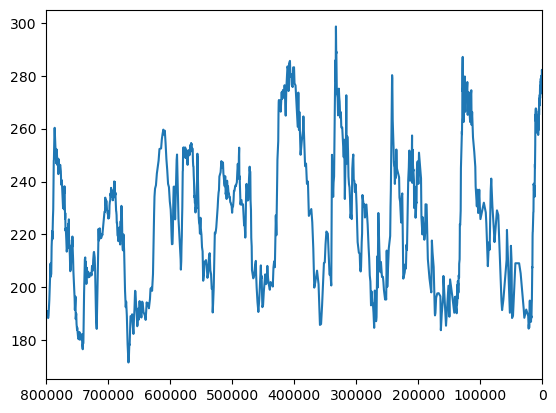

In [4]:
#first we import the CO2 data from the 41586_2008_BFnature06949_MOESM31_ESM.xls

CO2dataset = pd.read_excel("41586_2008_BFnature06949_MOESM31_ESM.xls", sheet_name="3.  Composite CO2", header=6) #here we are importing the data from the excel file, specifying the sheet name and the row that should br treated as the header.


# Now we generate a graph of the data set
x = CO2dataset['EDC3_gas_a (yr)']
y = CO2dataset['CO2 (ppmv)']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(800000,0)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

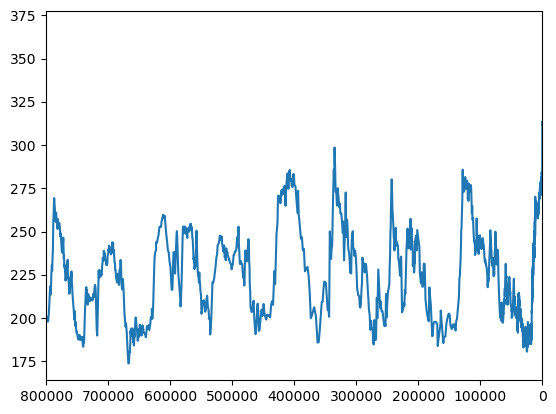

In [5]:
#Next we import the CO2 data from the 'grl52461-sup-0003-supplementary.xls' file from the IPCC report

AltCO2 = pd.read_excel("grl52461-sup-0003-supplementary.xls", sheet_name="CO2 Composite", header=14) #here we are importing the data from the excel file, specifying the sheet name and the row that should br treated as the header.
AltCO2.rename(columns = {'CO2 (ppmv)': 'CO2 (ppmv) IPCC'},inplace=True) #renaming the CO2 column for use later in the notebook

# Now we generate a graph of the data set
x = AltCO2['Gasage (yr BP) ']
y = AltCO2['CO2 (ppmv) IPCC']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(800000,0)
plt.show

In [6]:
#Create a new empty dataframe to import CO2 data from both sources

CO2df = pd.concat([CO2dataset['EDC3_gas_a (yr)'], CO2dataset['CO2 (ppmv)'], AltCO2['CO2 (ppmv) IPCC']],axis=1, join='inner')
CO2df.rename(columns = {'EDC3_gas_a (yr)': 'year'},inplace=True) #renaming the CO2 column for use later in the notebook
#CO2df = pd.concat(CO2)
display(CO2df)


,year,CO2 (ppmv),CO2 (ppmv) IPCC
0,137,280.4,368.022488
1,268,274.9,361.780737
2,279,277.9,359.647793
3,395,279.1,357.106740
4,404,281.9,353.946685
...,...,...,...
1091,794608,199.4,189.400000
1092,795202,195.2,190.100000
1093,796467,189.3,207.700000
1094,797099,188.4,213.200000


<function matplotlib.pyplot.show(close=None, block=None)>

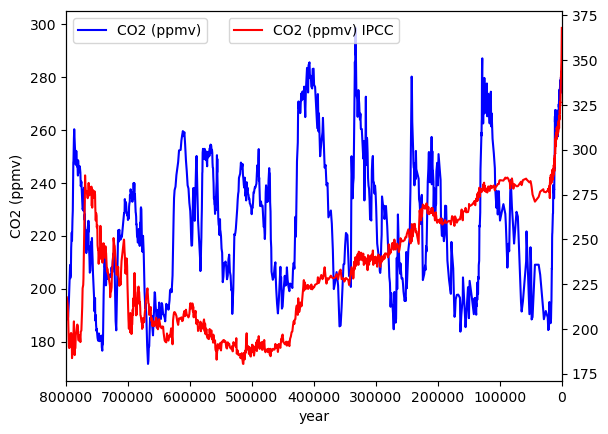

In [7]:
#Now we plot both CO2 sources on a single graph to compare trends over time
# Now we generate a graph of the data set
x = CO2df['year']
y = CO2df['CO2 (ppmv)']
z = CO2df['CO2 (ppmv) IPCC']
fig, ax1 = plt.subplots()
ax1.plot(x,y, label = 'CO2 (ppmv)', color='blue')
plt.legend(loc = 'upper left')
plt.xlabel("year")
plt.ylabel("CO2 (ppmv)")
ax1.set_xlim(800000,0)
ax2= ax1.twinx()
ax2.plot(x,z, label='CO2 (ppmv) IPCC', color = 'Red')
plt.legend(loc = 'upper center')
ax2.set_xlim(800000,0)

plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

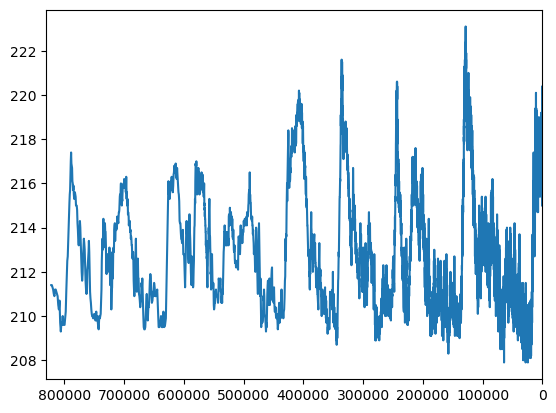

In [8]:
#Next we import the temparature data from the 'epicaDC.deuttemp.EDC3-AICC.xls' file

tempdata = pd.read_excel("epicaDC.deuttemp.EDC3-AICC.xls") #here we are importing the data from the excel file.
tempdata

# Now we generate a graph of the data set
x = tempdata['AICC2012']
y = tempdata['temp']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(830000,0)
plt.show

In [9]:
#Import ch4 data from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt 
#I tried to download a file containing the data but was unable to. I compied and pasted the data from the web to the txt file and saved it in the project folder

ch4raw = pd.read_fwf('EPICA Dome C Ice Core 800KYr Methan.txt') #read in the data from the txt file


        Depth  Gas Age  CH4 mean    1s Lab.
0       99.34       13       907  10.0    b
1      102.45      126       784  10.0    g
2      102.58      130       762  10.0    b
3      103.34      151       710  10.0    g
4      104.33      184       727  10.0    g
...       ...      ...       ...   ...  ...
2098  3188.00   794938       428  10.0    g
2099  3188.90   796320       418  10.0    b
2100  3189.40   797277       396  10.0    g
2101  3190.00   798417       458  10.0    g
2102  3190.50   799396       399  10.0    g

[2103 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

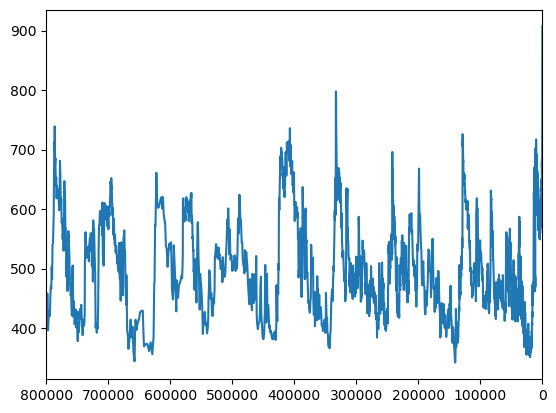

In [13]:
# Now we generate a graph of the data set
x = ch4raw['Gas Age']
y = ch4raw['CH4 mean']
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(800000,0)
plt.show

In [16]:
#Now, we want to create a new data frame that contains the CO2, Temperature and ch4 data sets in a single data fram for surther analysis.

dfFinal = pd.concat([CO2dataset['EDC3_gas_a (yr)'], CO2dataset['CO2 (ppmv)'], tempdata['temp'], ch4raw['CH4 mean']],axis=1, join='inner') # This creates a single data frame with each of the datasets included in a single data frame
dfFinal.rename(columns = {'EDC3_gas_a (yr)': 'year'},inplace=True) #renaming the CO2 column for use later in the notebook
display(dfFinal)

,year,CO2 (ppmv),temp,CH4 mean
0,137,280.4,218.3,907
1,268,274.9,218.3,784
2,279,277.9,218.3,762
3,395,279.1,218.3,710
4,404,281.9,218.3,727
...,...,...,...,...
1091,794608,199.4,209.0,545
1092,795202,195.2,209.3,548
1093,796467,189.3,209.5,539
1094,797099,188.4,209.2,565


<function matplotlib.pyplot.show(close=None, block=None)>

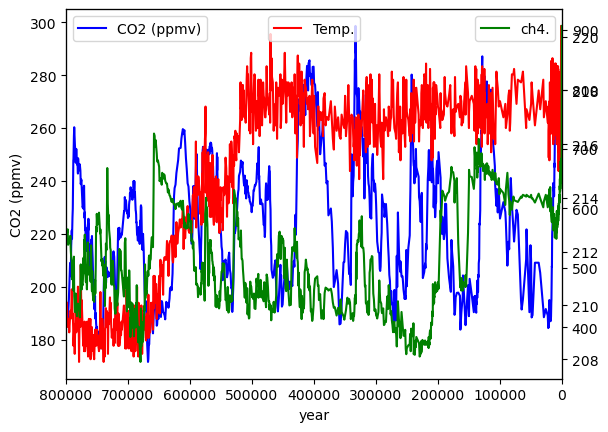

In [20]:
#Now we want to graph each of the three variables on a single chart

x = dfFinal['year']
y = dfFinal['CO2 (ppmv)']
z = dfFinal['temp']
aa = dfFinal['CH4 mean']
fig, ax1 = plt.subplots()
ax1.plot(x,y, label = 'CO2 (ppmv)', color='blue')
plt.legend(loc = 'upper left')
plt.xlabel("year")
plt.ylabel("CO2 (ppmv)")
ax1.set_xlim(800000,0)
ax2= ax1.twinx()
ax2.plot(x,z, label='Temp.', color = 'Red')
plt.legend(loc = 'upper center')
ax2.set_xlim(800000,0)
ax3= ax1.twinx()
ax3.plot(x,aa, label='ch4.', color = 'Green')
plt.legend(loc = 'upper right')


plt.show

In [22]:
#Next we export the dataframe to csv

dfFinal.to_csv('climate dataset', sep=',', index_label='index')

In [ ]:
#Next is to export data to json format
dfFinal.to_json('climate dataset')

**References**

- https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
- https://pythonbasics.org/matplotlib-line-chart/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
-
-
-
